Initial Data Preview:
   month  price
0  1-Jan  266.0
1  1-Feb  145.9
2  1-Mar  183.1
3  1-Apr  119.3
4  1-May  180.3

Missing values:
month    0
price    5
dtype: int64

Summary Statistics of Cleaned Data:
            price
count   36.000000
mean   310.530556
std    144.692786
min    119.300000
25%    193.925000
50%    273.300000
75%    402.875000
max    682.000000


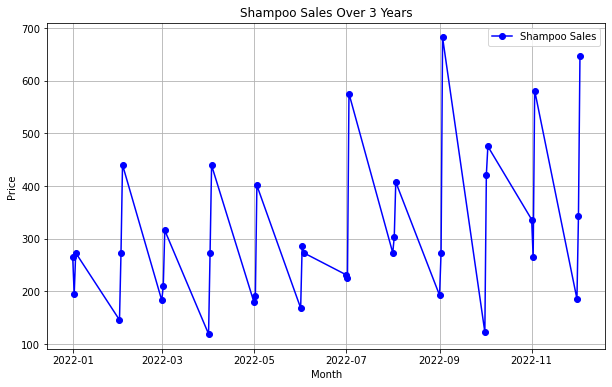


Cleaned Data Preview:
            price
month            
2022-01-01  266.0
2022-01-02  194.3
2022-01-03  273.3
2022-02-01  145.9
2022-02-02  273.3


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

file_path = 'C:\\Users\\Lenovo\\Downloads\\1.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

print("Initial Data Preview:")
print(data.head())

missing_values = data.isnull().sum()
print("\nMissing values:")
print(missing_values)

data['price'].fillna(data['price'].median(), inplace=True)  # Fills missing 'price' with median

data['month'] = pd.to_datetime(data['month'], format='%d-%b')

data['month'] = data['month'].apply(lambda x: x.replace(year=2022)) 
data.sort_values('month', inplace=True)

z_scores = stats.zscore(data['price'])
outliers = (z_scores > 3) | (z_scores < -3)  
data = data[~outliers]  

data.set_index('month', inplace=True)

print("\nSummary Statistics of Cleaned Data:")
print(data.describe())

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['price'], marker='o', linestyle='-', color='b', label='Shampoo Sales')
plt.title('Shampoo Sales Over 3 Years')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
print("\nCleaned Data Preview:")
print(data.head())
